# Ridge Regressionによる推定
## ライブラリのインポート

In [ ]:
# データ加工・計算・分析ライブラリ
import numpy as np
import pandas as pd

# グラフ描画ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習ライブラリ
import sklearn
from sklearn.linear_model import Ridge, Lasso # 回帰モデル生成のためのクラス
import japanize_matplotlib

## データの取得と読み込み

In [20]:
# データを取得
url = 'https://raw.githubusercontent.com/yumi-ito/sample_data/master/ridge_lasso_50variables.csv'

# 取得したデータをDataFrameオブジェクトとして読み込み
df = pd.read_csv(url)

print(df.shape)

(150, 51)


In [7]:
# ｢y｣列を削除して説明変数xを作成
x = df.drop('y', axis=1)

# ｢y｣列を抽出して目的変数yを作成
y = df['y']

## 正則化パラメータの$\lambda$生成

In [8]:
# λ(alpha)を50通り生成
num_alphas = 50
alphas = np.logspace(-2, 0.7, num_alphas)

print(alphas)

[0.01       0.01135278 0.01288855 0.01463208 0.01661147 0.01885863
 0.02140978 0.02430604 0.02759411 0.03132697 0.0355648  0.04037592
 0.04583788 0.05203871 0.05907838 0.06707036 0.07614347 0.08644397
 0.09813789 0.11141375 0.12648552 0.14359617 0.1630215  0.18507465
 0.21011109 0.2385344  0.27080274 0.30743627 0.34902549 0.39624079
 0.44984327 0.51069695 0.57978277 0.65821435 0.74725596 0.8483429
 0.96310463 1.09339104 1.24130227 1.40922258 1.59985872 1.81628365
 2.06198601 2.34092638 2.65760111 3.01711481 3.42526264 3.8886237
 4.41466709 5.01187234]


## Ridge Regressionによる推定

In [10]:
# 回帰係数を格納する変数
ridge_coefs = []

# alphaを入れ替えながらリッジ回帰の推定をくりかえす
for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept = False)
    ridge.fit(x, y)
    ridge_coefs.append(ridge.coef_)

print(ridge_coefs[:2])

[array([ 6.21882544, -0.78973526, -0.690699  , -1.75122226, -0.31413473,
        0.30415192,  0.69285974,  0.63802976,  1.98542014,  1.01370841,
       -1.63466367,  3.19131148, -0.23621373,  2.55203224, -3.42097191,
        0.61072631, -2.98809543,  0.32121943, -0.23133837, -1.63150305,
        1.10190727, -1.62420724,  1.62710416, -5.01410802,  5.2050586 ,
       -1.39099848,  2.16328818, -4.40622153,  4.2383212 , -0.75011182,
        2.68014135,  3.77959147, -1.67688839, -0.0432251 , -1.91699123,
       -2.32859425,  3.47944483, -7.22530252, -2.24425137, -8.20548992,
        3.31754651,  8.46812873,  0.0536943 , -3.00674397, -1.03359282,
        2.0807611 ,  9.58193753, -6.77384084, -3.65494323,  4.718053  ]), array([ 6.17659602e+00, -7.05363516e-01, -7.26383838e-01, -1.62802450e+00,
       -3.10055274e-01,  2.54563219e-01,  6.38813433e-01,  5.71614525e-01,
        1.82020349e+00,  9.49882912e-01, -1.39390612e+00,  2.88001689e+00,
       -1.97761632e-01,  2.32493077e+00, -3.02772850

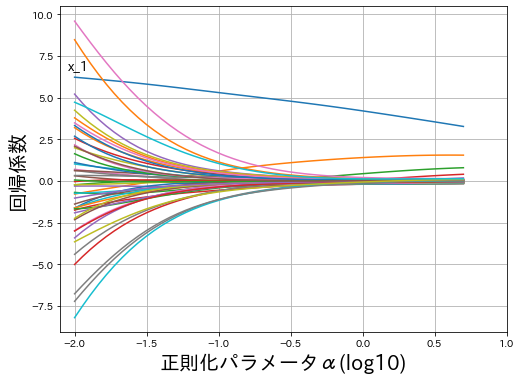

In [25]:
# alphasを対数変換(-log10)
log_alphas = np.log10(alphas)

# グラフ領域のサイズ指定
plt.figure(figsize = (8,6))

# x軸にλ、y軸に係数を置いた折れ線グラフ
plt.plot(log_alphas, ridge_coefs)

# 説明変数x_1を表示
plt.text(min(log_alphas) - 0.05, np.array(ridge_coefs)[0,0]+0.5, "x_1", fontsize=13)

# x軸の範囲を指定
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])

# 軸ラベル
plt.xlabel("正則化パラメータα(log10)", fontsize=20)
plt.ylabel("回帰係数", fontsize=20)

# 目盛線
plt.grid()
plt.savefig("Ridge Regression.png")